# Implementação dos experimentos para Trabalho de Conclusão de Curso 
## Análise de Sentimentos: Impacto da Tradução Neural na Avaliação de Desempenho
### Autoria: Lincoln Wallace Valentim da Costa Silva
### Orientador: Yuri de Almeida Malheiros Barbosa

Importação das biblotecas:

In [1]:
!pip3 install transformers
!pip3 install dl-translate
!pip3 install emoji
!pip3 install tensorflow
!pip3 install numpy
!pip3 install tensorflow_hub

### Importação das bibliotecas:

In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
import dl_translate as dlt
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, matthews_corrcoef, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

2023-11-02 05:20:26.440165: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-02 05:20:26.863367: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-02 05:20:26.866055: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-02 05:20:28.609098: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/lincoln81/.local/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Carregamento da API de tradução, para utilização do modelo M2M-100.

In [4]:
mt = dlt.TranslationModel()

###  Modelo de classificação de Tweets, treinado com 23 milhões de exemplos em inglês, sobre covid.

### Este é um modelo multilíngue baseado em XLM-roBERTa treinado em aproximadamente 198 milhões de tweets e ajustado para análise de sentimento. O ajuste fino do sentimento foi feito em 8 idiomas (Ar, En, Fr, De, Hi, It, Sp, Pt).

In [5]:
from transformers import pipeline
model_path = "cardiffnlp/twitter-xlm-roberta-base-sentiment"
sentiment_task = pipeline("sentiment-analysis", model=model_path, tokenizer=model_path)
sentiment_task("que dia pessimo")

[{'label': 'negative', 'score': 0.9488404989242554}]

### Implementação das funções de tradução e classificação:

In [61]:
def translaterText(text):
  translater = mt.translate(text, source=dlt.lang.PORTUGUESE, target=dlt.lang.ENGLISH)
  return translater


def classificationText(text):
  sentiment = sentiment_task(text)

  sentiment = sentiment[0]['label']

  sentiment = sentiment.replace('positive', '1').replace('negative', '-1').replace('neutral', '0')

  return sentiment


### Carregamento dos conjuntos de dados: TweetSentBr e B2W-Review01

In [16]:
tweetSent = pd.read_csv("./TweetSentBR.csv")
b2w = pd.read_csv("./B2W-Review.csv")

In [17]:
tweetSent

,id,id_twitter,text,sentiment
0,1343,863044774588272640,Que coisa linda! O Programa #encontro estava m...,1
1,1344,865583716088766467,"Por mais #Encontro com as Irmãs Galvão, adorei...",1
2,1345,865063232201011201,Mr. CATRA @OficialMrCatra lançando sua nova mú...,1
3,1346,864668391008763905,quem viu aquela lutadora modela barbuda tatuad...,0
4,1347,865572794016378882,Tô passada com esse cara.... quanta merda pode...,-1
...,...,...,...,...
11560,12908,864636619000877056,eu ja to aqui pronto pro #MasterChefBR mas ain...,-1
11561,12909,863581588713603072,MALUCO! Uma coisa que eu não tenho coragem é e...,-1
11562,12910,864831041349054464,#MaisVoce @ANAMARIABRAGA está linda @RedeGlobo,1
11563,12911,863042798575951872,"Que orgulho de ti, @sportrecife! #Encontro",1


In [18]:
b2w

,original_index,review_text,review_text_processed,review_text_tokenized,polarity,rating,kfold_polarity,kfold_rating
0,11955,Bem macio e felpudo...recomendo. Preço imbatí...,bem macio e felpudo...recomendo. preco imbati...,"['bem', 'macio', 'felpudo', 'recomendo', 'prec...",1.0,4,1,1
1,35478,Produto excepcional! recomendo!!! inovador e ...,produto excepcional! recomendo!!! inovador e ...,"['produto', 'excepcional', 'recomendo', 'inova...",1.0,5,1,1
2,122760,recebi o produto antes do prazo mas veio com d...,recebi o produto antes do prazo mas veio com d...,"['recebi', 'produto', 'antes', 'do', 'prazo', ...",0.0,1,1,1
3,17114,Bom custo beneficio. Adequado para pessoas que...,bom custo beneficio. adequado para pessoas que...,"['bom', 'custo', 'beneficio', 'adequado', 'par...",1.0,5,1,1
4,19112,Além de higiênico tem o tamanho ideal. Só falt...,alem de higienico tem o tamanho ideal. so falt...,"['alem', 'de', 'higienico', 'tem', 'tamanho', ...",NaN,3,-1,1
...,...,...,...,...,...,...,...,...
132368,41993,SMARTHPHONE PERFEITO MUITO BOM E A ECONO...,smarthphone perfeito muito bom e a econo...,"['smarthphone', 'perfeito', 'muito', 'bom', 'e...",1.0,5,10,10
132369,97639,Eu estou muito chateado com isso gostaria que ...,eu estou muito chateado com isso gostaria que ...,"['eu', 'estou', 'muito', 'chateado', 'com', 'i...",0.0,1,10,10
132370,95939,"Vale a pena pelo preço oferecido, qualidade a ...","vale a pena pelo preco oferecido, qualidade a ...","['vale', 'pena', 'pelo', 'preco', 'oferecido',...",NaN,3,-1,10
132371,117952,O produto anunciado no site dizia ser 100% al...,o produto anunciado no site dizia ser 100% al...,"['produto', 'anunciado', 'no', 'site', 'dizia'...",0.0,1,10,10


### Retirando colunas que não são necessarias para o experimento:

In [19]:
tweetSent.drop(columns = ['id','id_twitter'], inplace=True)
b2w.drop(columns = ['original_index', 'review_text_processed', 'review_text_tokenized', 'rating', 'kfold_polarity', 'kfold_rating'], inplace=True)

### Retirando valones N/A:

In [21]:
tweetSent.dropna(inplace=True)
b2w.dropna(inplace=True)

### Selecionando os 100 exemplos de positivos e negativos:

In [ ]:
b2w = b2w[b2w['polarity'] == 1].head(100)
b2w = b2w.append(b2w[b2w['polarity'] == 0].head(20))

### Tradução dos conjunto de dados TweetSent Br e B2W-Review01:

In [ ]:
tweetSent['tweets_translater_face'] = tweetSent['text'].apply(translaterText)
b2w['reviews_translater_face'] = b2w['review_text'].apply(translaterText)

### Conjuntos de dados após a tradução:

In [33]:
tweetSent


,tweets_original,tweets_translater_face,polarity
0,Que coisa linda! O Programa #encontro estava m...,What a beautiful thing! The #touch program was...,1.0
1,"Por mais #Encontro com as Irmãs Galvão, adorei...","For more I met with the Galvan Sisters, I love...",1.0
2,Mr. CATRA lançando sua nova música PPK CHORA ...,Mr. CATRA releases his new song PPK CHORA on k...,1.0
3,quem viu aquela lutadora modela barbuda tatuad...,Who saw that fighter model tattooed? #MasterCh...,0.0
4,Tô passada com esse cara.... quanta merda pode...,How much shit can come out of someone’s mouth ...,-1.0
...,...,...,...
11523,a animação da filha da vanessa da mata é de se...,The animation of the daughter of the vanessa o...,1.0
11524,eu ja to aqui pronto pro #MasterChefBR mas ain...,I'm ready to go here for #MasterChefBR but I'm...,-1.0
11525,MALUCO! Uma coisa que eu não tenho coragem é e...,One thing I don’t have the courage is that nor...,-1.0
11526,#MaisVoce está linda,#MaisVoce is beautiful,1.0


In [52]:
b2w

,review_text,review_translater_face,polarity
0,Bem macio e felpudo...recomendo. Preço imbatí...,Good soft and smooth I recommend. unbeatable p...,1.0
1,Produto excepcional! recomendo!!! inovador e ...,Excellent product! recommend!!! innovative and...,1.0
2,Bom custo beneficio. Adequado para pessoas que...,Good cost benefit. Suitable for people who do ...,1.0
3,"ótmo produto atendeu as expectativas, a entreg...","The product fulfilled expectations, the delive...",1.0
4,"GOSTEI MUITO DO PRODUTO! TEM ÓTIMA QUALIDADE, ...","It has excellent quality, and makes it very ea...",1.0
...,...,...,...
195,A entrega foi rápida o produto veio lacrado e...,Delivery was fast the product came tears and i...,0.0
196,Comprei o carrinha em 8 dias foi entregue... n...,I bought the car in 8 days was delivered... in...,0.0
197,ENGANAÇÃO ! NÃO FUNCIONA NO BRASIL ! Esperei q...,I waited almost a month and I received a phone...,0.0
198,"A capa tem uma apresentação legal, mas eu comp...","The cover has a legal presentation, but I boug...",0.0


### Classificando os conjuntos de dados:

In [66]:
tweetSent['polarityMultiClassifierTweetsOriginal'] = tweetSent['tweets_original'].apply(classificationText)
tweetSent['polarityMultiClassifierTweetsTraduzido'] = tweetSent['tweets_translater_face'].apply(classificationText)
b2w['polarityMultiClassifierReviewsOriginal'] = b2w['review_text'].apply(classificationText)
b2w['polarityMultiClassifierReviewsTraduzido'] = b2w['reviews_translater_face'].apply(classificationText)

### Mudando para float a coluna para conseguir fazer os caculos das metricas avaliativas:

In [68]:
tweetSent['polarityMultiClassifierTweetsOriginal'] = tweetSent['polarityMultiClassifierTweetsOriginal'].astype(float)
tweetSent['polarityMultiClassifierTweetsTraduzido'] = tweetSent['polarityMultiClassifierTweetsTraduzido'].astype(float)
b2w['polarityMultiClassifierReviewsOriginal'] = b2w['polarityMultiClassifierReviewsOriginal'].astype(float)
b2w['polarityMultiClassifierReviewsTraduzido'] = b2w['polarityMultiClassifierReviewsTraduzido'].astype(float)


### Replace no B2W-Review01 para conseguir calcular as metricas avaliativas: 

In [78]:
b2w['polarity'].replace(0, -1, inplace=True)

### Resutaldos das classificações e calculos das metricas avaliativas: F1-Score, Precisão e Cobertura.

In [79]:
results = {
  'Dataset': ['tweetSentBr'],
  'Original': [pd.DataFrame({'F1': [f1_score(tweetSent['polarity'], tweetSent['polarityMultiClassifierTweetsOriginal'], average='weighted')], 'Precision': [precision_score(tweetSent['polarity'], tweetSent['polarityMultiClassifierTweetsOriginal'], average='weighted')], 'Recall': [recall_score(tweetSent['polarity'], tweetSent['polarityMultiClassifierTweetsOriginal'], average='weighted')]})],
  'Traduzido': [pd.DataFrame({'F1': [f1_score(tweetSent['polarity'], tweetSent['polarityMultiClassifierTweetsTraduzido'], average='weighted')], 'Precision': [precision_score(tweetSent['polarity'], tweetSent['polarityMultiClassifierTweetsTraduzido'], average='weighted')], 'Recall': [recall_score(tweetSent['polarity'], tweetSent['polarityMultiClassifierTweetsTraduzido'], average='weighted')]})]
}

In [80]:
results['Original'][0]

,F1,Precision,Recall
0,0.598053,0.609495,0.593197


In [81]:
results['Traduzido'][0]

,F1,Precision,Recall
0,0.532956,0.547365,0.526206


In [83]:
matrizConfusaoOriginal = confusion_matrix(tweetSent['polarity'], tweetSent['polarityMultiClassifierTweetsOriginal'])

In [84]:
matrizConfusaoOriginal

array([[2110,  729,  547],
       [ 798, 1502,  625],
       [ 888, 1101, 3224]])

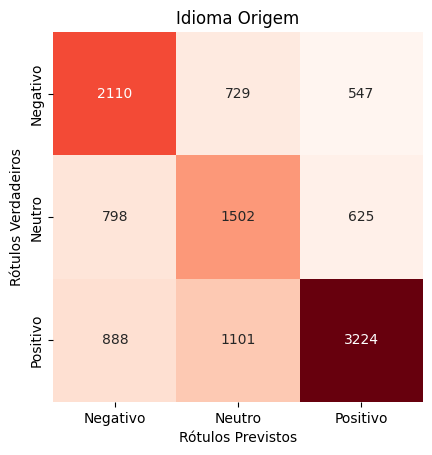

In [85]:
sns.heatmap(matrizConfusaoOriginal, annot=True, fmt="d", cmap="Reds", cbar=False, square=True,
            xticklabels=["Negativo","Neutro", "Positivo"], yticklabels=["Negativo","Neutro", "Positivo"])


plt.xlabel("Rótulos Previstos")
plt.ylabel("Rótulos Verdadeiros")
plt.title("Idioma Origem")
fig1 = plt.gcf()

plt.show()



In [86]:
matrizConfusaoTraduzido = confusion_matrix(tweetSent['polarity'], tweetSent['polarityMultiClassifierTweetsTraduzido'])


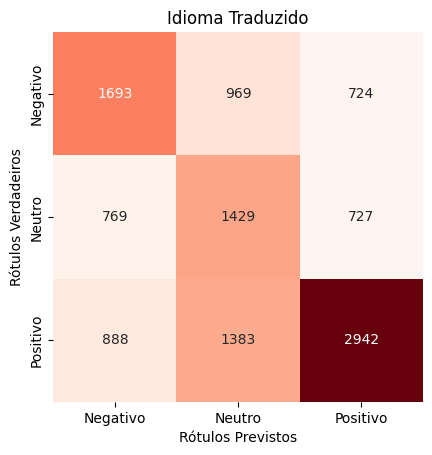

In [87]:
sns.heatmap(matrizConfusaoTraduzido, annot=True, fmt="d", cmap="Reds", cbar=False, square=True,
             xticklabels=["Negativo","Neutro", "Positivo"], yticklabels=["Negativo","Neutro", "Positivo"])

plt.xlabel("Rótulos Previstos")
plt.ylabel("Rótulos Verdadeiros")
plt.title("Idioma Traduzido")

fig2 = plt.gcf()

plt.show()

In [90]:
resultss = {
  'dataset': ['B2W'],
  'Original': [pd.DataFrame({'F1': [f1_score(b2w['polarity'], b2w['polarityMultiClassifierReviewsOriginal'], average='micro')], 'Precision': [precision_score(b2w['polarity'], b2w['polarityMultiClassifierReviewsOriginal'], average='micro')], 'Recall': [recall_score(b2w['polarity'], b2w['polarityMultiClassifierReviewsOriginal'], average='micro')]})],
  'Traduzido': [pd.DataFrame({'F1': [f1_score(b2w['polarity'], b2w['polarityMultiClassifierReviewsTraduzido'], average='micro')], 'Precision': [precision_score(b2w['polarity'], b2w['polarityMultiClassifierReviewsTraduzido'], average='micro')], 'Recall': [recall_score(b2w['polarity'], b2w['polarityMultiClassifierReviewsTraduzido'], average='micro')]})]
}

In [91]:
resultss['Original'][0]

,F1,Precision,Recall
0,0.83,0.83,0.83


In [92]:
resultss['Traduzido'][0]

,F1,Precision,Recall
0,0.805,0.805,0.805


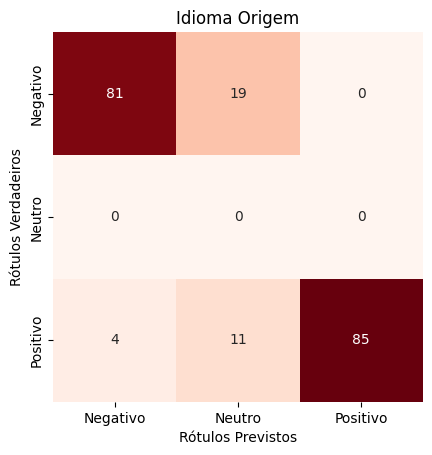

In [94]:
matrizConfusaoB2wOriginal = confusion_matrix(b2w['polarity'], b2w['polarityMultiClassifierReviewsOriginal'])

sns.heatmap(matrizConfusaoB2wOriginal, annot=True, fmt="d", cmap="Reds", cbar=False, square=True,
             xticklabels=["Negativo","Neutro","Positivo"], yticklabels=["Negativo","Neutro","Positivo"])

plt.xlabel("Rótulos Previstos")
plt.ylabel("Rótulos Verdadeiros")
plt.title("Idioma Origem")

fig3 = plt.gcf()

plt.show()


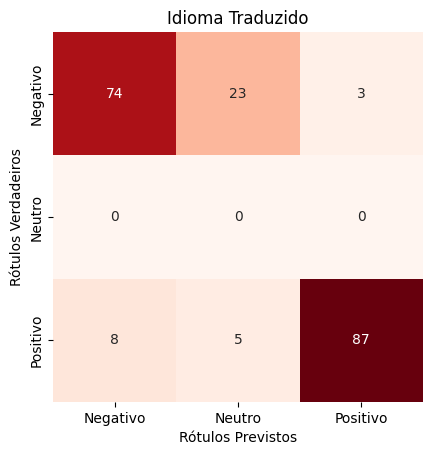

In [98]:
matrizConfusaoB2wTraduzido = confusion_matrix(b2w['polarity'], b2w['polarityMultiClassifierReviewsTraduzido'])

sns.heatmap(matrizConfusaoB2wTraduzido, annot=True, fmt="d", cmap="Reds", cbar=False, square=True,
              xticklabels=["Negativo","Neutro" ,"Positivo"], yticklabels=["Negativo","Neutro","Positivo"])

plt.xlabel("Rótulos Previstos")
plt.ylabel("Rótulos Verdadeiros")
plt.title("Idioma Traduzido")

fig4 = plt.gcf()

plt.show()

In [ ]:
tweetSent.to_csv('tweetSentBrFinal.csv', index=False)
b2w.to_csv('b2wFinal.csv', index=False)